In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12,9])                   # 指定图片大小
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
sns.set_style('darkgrid')                    # darkgrid,whitegrid,dark,white,ticks

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 1 线性回归

使用seaborn中的两个主要功能来显示通过回归确定的线性关系。这些功能regplot()并且lmplot()密切相关，并且共享其核心功能。理解它们的不同方式很重要，但是，以便您可以快速选择适合特定工作的正确工具。

在最简单的调用，这两个函数绘制两个变量的散点图，x和y，然后拟合回归模型并绘制得到的回归直线和该回归一个95％置信区间：y ~ x

regplot()和lmplot()都可以绘制回归关系，推荐使用regplot()

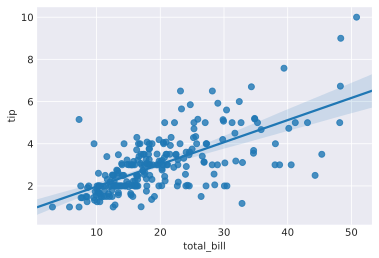

In [3]:
sns.regplot(x="total_bill",y="tip",data=tips)

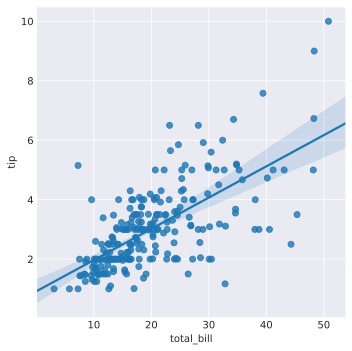

In [4]:
sns.lmplot(x="total_bill", y="tip", data=tips)

您应该注意，除了图形的形状不同之外，所得到的图是相同的。

就目前而言，了解的其它主要区别是，regplot()接受x和y变量以多种格式，包括numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data

相反，lmplot()具有data必要的参数，x并且y必须将变量指定为字符串。这种数据格式被称为“长形”或“整洁”数据。

除了这种输入灵活性之外，还regplot()拥有一部分lmplot()功能，因此我们将使用后者来演示它们。

当其中一个变量采用离散值时，可以拟合线性回归，但是，这种数据集生成的简单散点图通常不是最优的

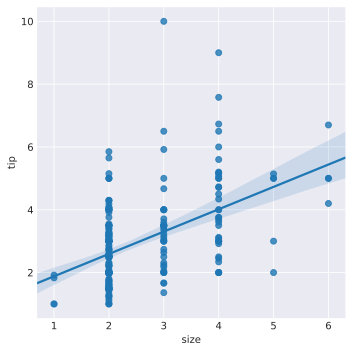

In [5]:
sns.lmplot(x="size", y="tip", data=tips)

一种选择是向离散值添加一些随机噪声（“抖动”），以使这些值的分布更清晰。请注意，抖动仅应用于散点图数据，并且不会影响回归线拟合：

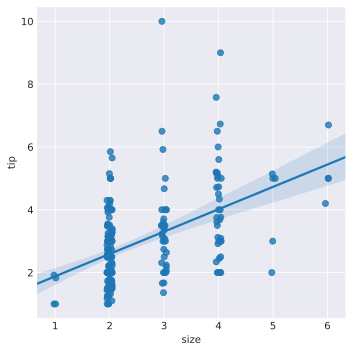

In [6]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

第二种选择是折叠每个离散箱中的观测值，以绘制集中趋势的估计值以及置信区间：

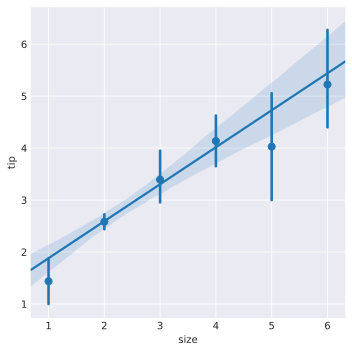

In [7]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)